In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("student-mat.csv")
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Column Definitions:
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- G3 - final grades

In [18]:
data.isnull().sum().sum()

0

As we can see above there is no NaN values in the data frame, so we don't need to worry about that.

In [35]:
# adding a new column of total weekly alcohol consumption
data['TotalAlc'] = data['Dalc'] + data['Walc']
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalAlc,average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,2,below average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,2,below average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,5,below average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,2,above average
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,3,below average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,9,below average
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,7,above average
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,6,below average
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,7,below average


In [29]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalAlc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,3.772152
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,1.984389
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,2.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,3.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,5.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,10.000000


Text(0.5, 1.0, 'Workday Alcohol Consumption')

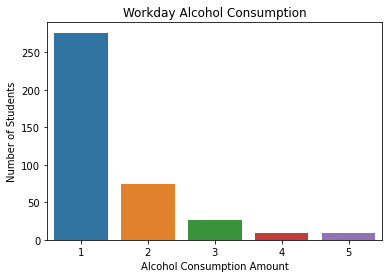

In [26]:
workdayalcohol = data["Dalc"].value_counts()
ax = sns.barplot(x = workdayalcohol.index, y = workdayalcohol.values)
plt.ylabel('Number of Students')
plt.xlabel('Alcohol Consumption Amount')
plt.title('Workday Alcohol Consumption')

Text(0.5, 1.0, 'Weekend Alcohol Consumption')

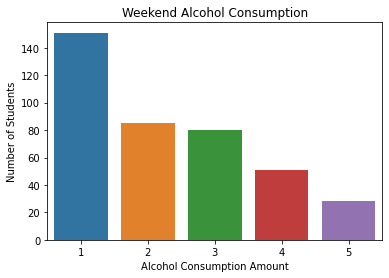

In [27]:
weekendalcohol = data["Walc"].value_counts()
ax = sns.barplot(x = weekendalcohol.index, y = weekendalcohol.values)
plt.ylabel('Number of Students')
plt.xlabel('Alcohol Consumption Amount')
plt.title('Weekend Alcohol Consumption')

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; yo

[Text(0.5, 1.0, 'Final Grades in Relation to Alcohol Consumption')]

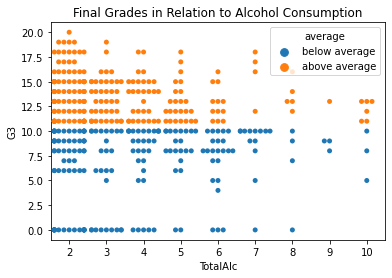

In [34]:
mean = sum(data.G3) / float(len(data))
data["average"] = ['above average' if i > mean else 'below average' for i in data.G3]
sns.swarmplot(x = 'TotalAlc', y = 'G3', hue = 'average', data = data).set(title = "Final Grades in Relation to Alcohol Consumption")

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Grade Distribution of Students Who Consume Less Alcohol')

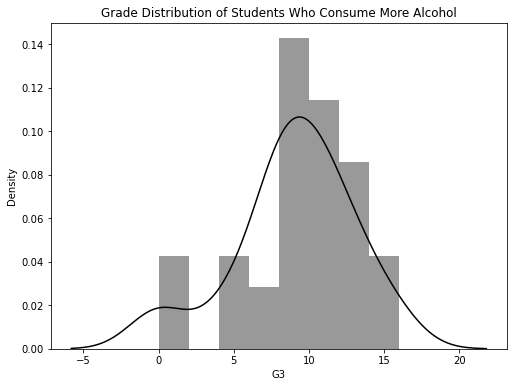

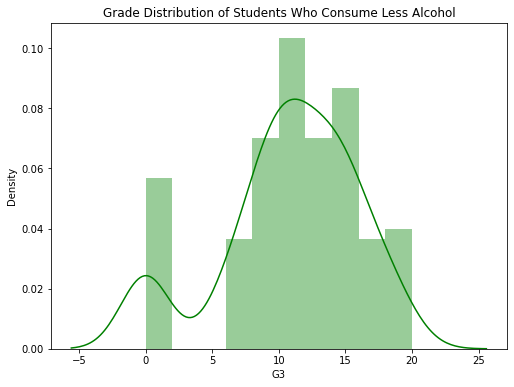

In [45]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
sns.distplot(data[(data.TotalAlc == 6)]["G3"], color = 'black', ax = ax)
ax.set_title('Grade Distribution of Students Who Consume More Alcohol')
ax = plt.figure(figsize=(18,6)).add_subplot(122)
sns.distplot(data[(data.TotalAlc == 2)]['G3'], color = 'green', ax = ax)
ax.set_title('Grade Distribution of Students Who Consume Less Alcohol')

Looking at the tables above, we can say that students who consumed more alcohol received lower grades compared to those who consumed less alcohol.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Failures of Students Who Consume Less Alcohol')

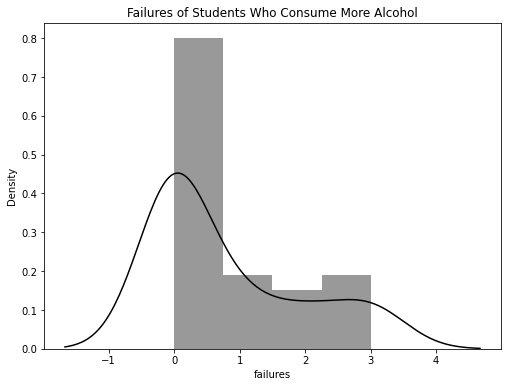

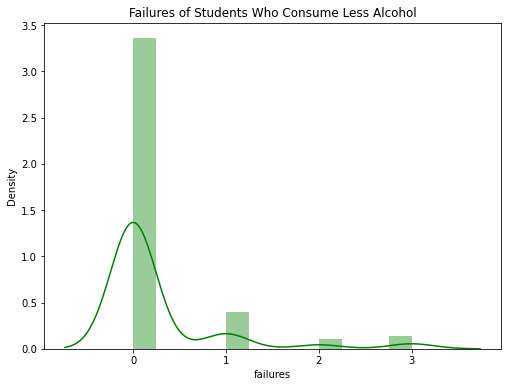

In [55]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
sns.distplot(data[(data.TotalAlc == 6)]["failures"], color = 'black', ax = ax)
ax.set_title('Failures of Students Who Consume More Alcohol')
ax = plt.figure(figsize=(18,6)).add_subplot(122)
sns.distplot(data[(data.TotalAlc == 2)]['failures'], color = 'green', ax = ax)
ax.set_title('Failures of Students Who Consume Less Alcohol')

Here, the number of students who did not fail any classes is significantly higher for students who consumed less alcohol compared to the ones who consumed more.  